In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [6]:
df = pd.read_csv('/home/ataur/New_H1.csv')

In [7]:
df.head()

,comp0,comp1,comp2
0,2.699166,14.861935,5.897864
1,-39.844319,1.259915,-10.542659
2,-24.488964,-0.222785,-9.119651
3,-28.669926,-6.799088,8.198834
4,-13.825622,-8.741446,6.704065


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   comp0   301 non-null    float64
 1   comp1   301 non-null    float64
 2   comp2   301 non-null    float64
dtypes: float64(3)
memory usage: 7.2 KB


In [29]:
df.describe()

,comp0,comp1,comp2
count,301.000000,301.000000,301.000000
mean,-0.157839,-0.082775,-0.011354
std,23.033692,16.692268,7.730427
min,-56.022760,-36.349089,-20.045623
25%,-17.316538,-11.289637,-5.761682
50%,-3.114313,-1.477993,0.605137
75%,15.079503,10.625311,5.300243
max,63.673564,43.497733,21.893132


In [9]:
df.isnull().sum()

comp0    0
comp1    0
comp2    0
dtype: int64

In [10]:
df.duplicated().sum()

0

# Outlier Treatment

comp0       AxesSubplot(0.125,0.71587;0.168478x0.16413)
comp1    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
comp2    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
dtype: object

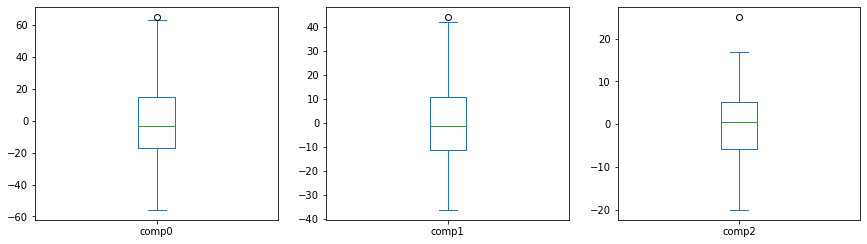

In [11]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,18))

In [12]:
# First Column
iqr = df['comp0'].quantile(0.75) - df['comp0'].quantile(0.25)
iqr

32.3960410398329

In [13]:
lower_limit = df['comp0'].quantile(0.25) - 1.5*(iqr)
lower_limit

-65.91059996628465

In [14]:
upper_limit = df['comp0'].quantile(0.75) + 1.5*(iqr)
upper_limit

63.67356419304695

In [15]:
df['comp0'] = np.where(df['comp0'] > upper_limit, upper_limit, np.where(df['comp0'] < lower_limit, lower_limit, df['comp0']))

In [16]:
# Second Column
iqr = df['comp1'].quantile(0.75) - df['comp1'].quantile(0.25)
iqr

21.9149479601976

In [17]:
lower_limit = df['comp1'].quantile(0.25) - 1.5*(iqr)
lower_limit

-44.16205887080291

In [18]:
upper_limit = df['comp1'].quantile(0.75) + 1.5*(iqr)
upper_limit

43.4977329699875

In [19]:
df['comp1'] = np.where(df['comp1'] > upper_limit, upper_limit, np.where(df['comp1'] < lower_limit, lower_limit, df['comp1']))

In [20]:
# Third Column
iqr = df['comp2'].quantile(0.75) - df['comp2'].quantile(0.25)
iqr

11.06192553833262

In [21]:
lower_limit = df['comp2'].quantile(0.25) - 1.5*(iqr)
lower_limit

-22.35457053924734

In [22]:
upper_limit = df['comp2'].quantile(0.75) + 1.5*(iqr)
upper_limit

21.893131614083142

In [23]:
df['comp2'] = np.where(df['comp2'] > upper_limit, upper_limit, np.where(df['comp2'] < lower_limit, lower_limit, df['comp2']))

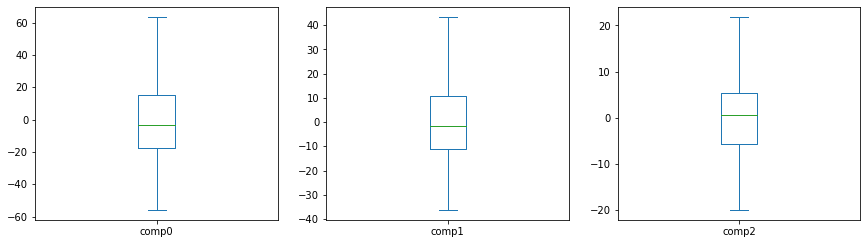

In [24]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,18));

# Normalization

In [25]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [26]:
df_norn = norm_func(df)

In [28]:
df_norn

,comp0,comp1,comp2
0,0.490591,0.641366,0.618604
1,0.135162,0.471014,0.226591
2,0.263448,0.452445,0.260522
3,0.228519,0.370084,0.673469
4,0.352535,0.345758,0.637827
...,...,...,...
296,0.697086,0.520628,0.395321
297,0.577470,0.145709,0.282612
298,0.571559,0.623267,0.703969
299,0.753431,0.384351,0.407450


In [30]:
df_norn.describe()

,comp0,comp1,comp2
count,301.000000,301.000000,301.000000
mean,0.466722,0.454199,0.477703
std,0.192434,0.209054,0.184327
min,0.000000,0.000000,0.000000
25%,0.323370,0.313844,0.340590
50%,0.442022,0.436725,0.492403
75%,0.594022,0.588306,0.604354
max,1.000000,1.000000,1.000000


# linkage and Dendrogram

In [31]:
z = linkage(df_norn, method='complete', metric='euclidean')

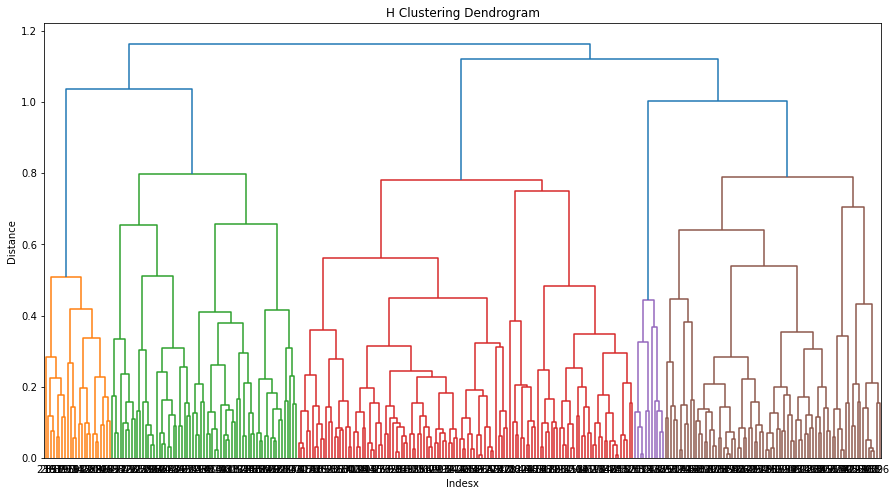

In [32]:
plt.figure(figsize=(15,8));plt.title('H Clustering Dendrogram');plt.xlabel('Indesx');plt.ylabel('Distance')
dendrogram(z, leaf_rotation=0, leaf_font_size=10)
plt.show()

# Agglomerative Cluster

In [36]:
a = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean').fit(df_norn)
a.labels_

array([1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1,
       0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1,
       0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1,
       0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1,
       0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2]

In [37]:
C = pd.Series(a.labels_)

In [39]:
df['Clust'] = C

In [40]:
df

,comp0,comp1,comp2,Clust
0,2.699166,14.861935,5.897864,1
1,-39.844319,1.259915,-10.542659,2
2,-24.488964,-0.222785,-9.119651,2
3,-28.669926,-6.799088,8.198834,2
4,-13.825622,-8.741446,6.704065,2
...,...,...,...,...
296,27.415875,5.221385,-3.466355,1
297,13.098262,-24.714687,-8.193215,0
298,12.390783,13.416774,9.477974,1
299,34.160215,-5.659872,-2.957668,0


In [41]:
df = df.iloc[:, [3,0,1,2]]

In [42]:
df

,Clust,comp0,comp1,comp2
0,1,2.699166,14.861935,5.897864
1,2,-39.844319,1.259915,-10.542659
2,2,-24.488964,-0.222785,-9.119651
3,2,-28.669926,-6.799088,8.198834
4,2,-13.825622,-8.741446,6.704065
...,...,...,...,...
296,1,27.415875,5.221385,-3.466355
297,0,13.098262,-24.714687,-8.193215
298,1,12.390783,13.416774,9.477974
299,0,34.160215,-5.659872,-2.957668


In [43]:
df.iloc[:, 1:].groupby(df.Clust).mean()

,comp0,comp1,comp2
Clust,,,
0,12.762748,-12.987921,-1.349761
1,13.949175,13.608982,2.062931
2,-20.251207,-0.448049,-0.530498


In [44]:
df.iloc[:, 1:].groupby(df.Clust).std()

,comp0,comp1,comp2
Clust,,,
0,18.892751,11.973060,10.211612
1,18.634014,15.559518,5.858603
2,11.078804,12.085508,6.418669


In [45]:
df.iloc[:, 1:].groupby(df.Clust).median()

,comp0,comp1,comp2
Clust,,,
0,8.152129,-14.691289,-4.361996
1,10.399145,12.074302,2.770030
2,-19.893128,0.822117,-0.074186
